In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("data/Dataset_1_EV_charging_reports.csv", sep=';')
df.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


In [50]:
df.shape

(6878, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
session_ID           6878 non-null int64
Garage_ID            6878 non-null object
User_ID              6878 non-null object
User_type            6878 non-null object
Shared_ID            1412 non-null object
Start_plugin         6878 non-null object
Start_plugin_hour    6878 non-null int64
End_plugout          6844 non-null object
End_plugout_hour     6844 non-null float64
El_kWh               6878 non-null object
Duration_hours       6844 non-null object
month_plugin         6878 non-null object
weekdays_plugin      6878 non-null object
Plugin_category      6878 non-null object
Duration_category    6844 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 806.1+ KB


In [102]:
# Statistical Insight
df['El_kWh'] = df['El_kWh'].apply(str).str.replace(',', '.').astype(float)
df['Duration_hours'] = df['Duration_hours'].apply(str).str.replace(',', '.').astype(float)
df[['Start_plugin_hour','End_plugout_hour','El_kWh','Duration_hours']].describe()

,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours
count,6878.000000,6844.000000,6878.000000,6844.000000
mean,16.325240,12.546902,12.720744,11.504440
std,4.363108,5.256756,11.787938,14.148168
min,0.000000,0.000000,0.010000,0.003333
25%,15.000000,7.000000,5.200000,2.789028
50%,17.000000,12.000000,9.050000,10.026250
75%,19.000000,17.000000,16.090000,15.221181
max,23.000000,23.000000,80.860000,255.029444


In [105]:
df[['Garage_ID','User_ID','weekdays_plugin']].describe()

,Garage_ID,User_ID,weekdays_plugin
count,6878,6878,6878
unique,24,97,7
top,Bl2,Bl2-5,Thursday
freq,2243,639,1072


In [109]:
# Data cleaning - handling missing value
# check total number of null for each columns
df.isnull().sum()

session_ID              0
Garage_ID               0
User_ID                 0
User_type               0
Shared_ID            5466
Start_plugin            0
Start_plugin_hour       0
End_plugout            34
End_plugout_hour       34
El_kWh                  0
Duration_hours         34
month_plugin            0
weekdays_plugin         0
Plugin_category         0
Duration_category      34
dtype: int64

In [121]:
# remove rows where 'End_plugout_hour is Nan'
df = df[df.End_plugout_hour.notnull()]

In [122]:
df.isnull().sum()

session_ID              0
Garage_ID               0
User_ID                 0
User_type               0
Shared_ID            5442
Start_plugin            0
Start_plugin_hour       0
End_plugout             0
End_plugout_hour        0
El_kWh                  0
Duration_hours          0
month_plugin            0
weekdays_plugin         0
Plugin_category         0
Duration_category       0
dtype: int64

In [125]:
# check duplicate records, no duplicate, so no dropping process
duplicate = df.duplicated()
df[duplicate]

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category


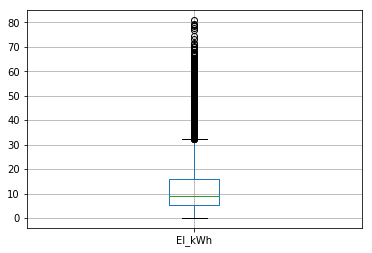

In [126]:
# handling outlier
df.boxplot(column=['El_kWh'])